In [3]:
### inserting neccesary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer


In [4]:
###
df=pd.read_csv('C:\\Users\\pc\\Desktop\\BFI Factor analysis\\bfi.csv')
df.head(10)

,rownames,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
5,61623,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
6,61624,2.0,5.0,5.0,3.0,5.0,5.0,4.0,4.0,2.0,...,1.0,1.0,5.0,2,5.0,6.0,1.0,1,NaN,18
7,61629,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
8,61630,4.0,3.0,6.0,3.0,3.0,6.0,6.0,3.0,4.0,...,3.0,3.0,6.0,6,6.0,6.0,1.0,1,1.0,19
9,61633,2.0,5.0,6.0,6.0,5.0,6.0,5.0,6.0,2.0,...,2.0,4.0,5.0,1,5.0,5.0,2.0,2,NaN,17


In [5]:
df.columns
#### a1 a2  a3 etc are the features 

Index(['rownames', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2',
       'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [6]:
df.drop(['gender','education','age','rownames'],axis=1,inplace=True)

In [7]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

In [8]:
df.isnull().sum()

A1    16
A2    27
A3    26
A4    19
A5    16
C1    21
C2    24
C3    20
C4    26
C5    16
E1    23
E2    16
E3    25
E4     9
E5    21
N1    22
N2    21
N3    11
N4    36
N5    29
O1    22
O2     0
O3    28
O4    14
O5    20
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

2

In [11]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  O3   

(2436, 25)

In [12]:
## lets apply factor analysis
fa=FactorAnalyzer(n_factors=6,rotation="varimax")

In [13]:
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [14]:
##
loadings=fa.loadings_


In [15]:
### get eigen  vectors  and eigen values 
ev,v= fa.get_eigenvalues()

In [16]:
### scree plot 
xvals=range(1,df.shape[1]+1)

Text(0, 0.5, 'eigenvalue')

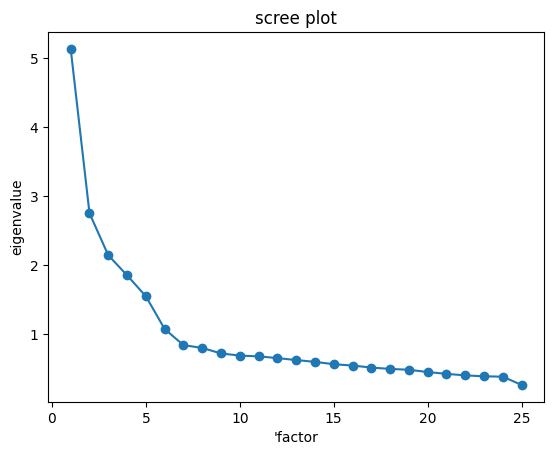

In [17]:
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.title("scree plot")
plt.xlabel("'factor")
plt.ylabel("eigenvalue")

In [18]:
pd.DataFrame.from_records(loadings)

,0,1,2,3,4,5
0,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
1,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
2,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
3,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
4,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
5,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
6,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
7,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
8,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
9,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423
